# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [67]:
from src.Lab_2_4_LR2 import LinearRegressor


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [68]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [69]:
linreg = LinearRegressor()
linreg.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [70]:
from src.Lab_2_4_LR2 import evaluate_regression

In [71]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275276, 'RMSE': 1.012647295683223, 'MAE': 0.8945454545454539}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [72]:
data = pd.read_csv("../data/synthetic_dataset.csv")
print(data)
# TODO: Obtain inputs and output from data
X = np.array(data.iloc[:, :4])
print(X)
y = np.array(data.iloc[:, 4])
print(y)

        Input1    Input2    Input3    Input4     Output
0     1.764052 -0.202117  0.330046  0.371232   6.788989
1     0.400157 -0.833231 -0.000480  0.304784   2.972974
2     0.978738  1.733600  0.818116  0.504125   7.089140
3     2.240893  0.190649  0.428214  0.135300  11.170032
4     1.867558 -0.177810 -2.503947  0.653759   8.199762
...        ...       ...       ...       ...        ...
9995 -1.809282  0.271662 -0.400898 -1.457199   4.251336
9996  0.042359 -0.108997 -0.585452  2.011115   4.873215
9997  0.516872 -0.057259 -1.511276  1.689858   5.574173
9998 -0.032921 -1.058931  0.976844  0.199966   3.842855
9999  1.298111 -0.326528  1.255501 -1.224331   1.955963

[10000 rows x 5 columns]
[[ 1.76405235e+00 -2.02117027e-01  3.30045889e-01  3.71232144e-01]
 [ 4.00157208e-01 -8.33231001e-01 -4.79979434e-04  3.04783891e-01]
 [ 9.78737984e-01  1.73360025e+00  8.18115898e-01  5.04124602e-01]
 ...
 [ 5.16872179e-01 -5.72592527e-02 -1.51127631e+00  1.68985759e+00]
 [-3.29206931e-02 -1.05893126

In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [73]:
# TODO: Train linear regression model
linreg = LinearRegressor()
linreg.fit(X, y)




In [74]:
# TODO: Obtain and print the regression performance metrics
#nuestra funcion predict funciona con la X ya añadiendo la columna de unos
X_with_bias = np.insert(
            X, 0, 1, axis=1
        ) 
X=X_with_bias
y_pred = linreg.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.5452814241832913, 'RMSE': 3.1936452748702813, 'MAE': 2.237394521024784}


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> Porque el histograma nos ayuda a ver si los residuos siguen una distribucion normal, el qq plot nos permite visualizar si los residuos tienen colas largas o si presentan asimetrías significativas y el scatterplot contra las variables de entrada, la variable objetivo y las predicciones nos permite identificar patrones en los residuos, lo que podría indicar problemas como heterocedasticidad (varianza desigual de los residuos) o relaciones no captadas por el modelo

In [75]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    # TODO: Calculate residuals
    residuals = y - y_pred
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns
    #esto es el numero de x que hay, por lo tanto habra este numero de coeficientes

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # TODO: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)# Fill the code here
    plt.title('Q-Q Plot of Residuals')

    # TODO: Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(residuals, y, alpha=0.5)     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col],residuals , alpha=0.5)   # Fill the code here
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: {'Coeficiente_0': -0.0019118098357402752, 'Coeficiente_1': -0.005980294661835374, 'Coeficiente_2': 1.6303240019912546, 'Coeficiente_3': 3.0593087306039632}


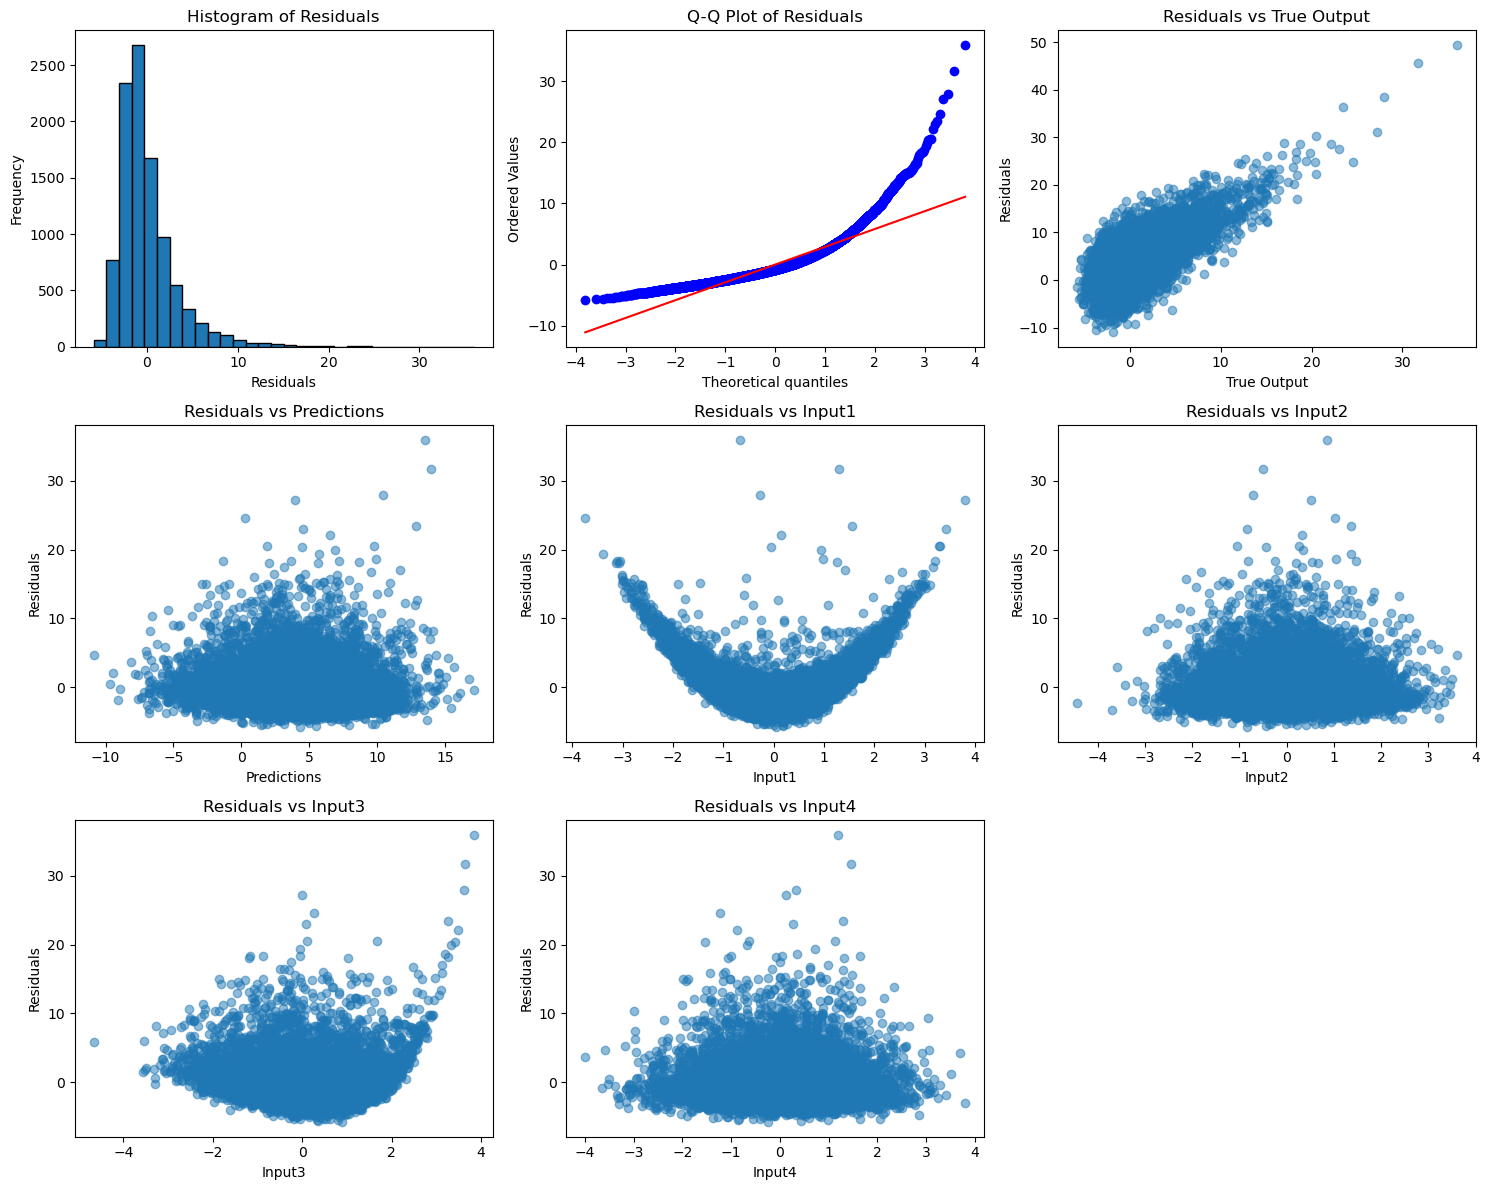

In [76]:
# TODO:  First, construct a dictionary of the coefficients to print them
coeficientes=linreg.coefficients
intercepto=linreg.intercept

# Construir el diccionario de coeficientes
coef_dict = {f"Coeficiente_{i}": coef for i, coef in enumerate(coeficientes)}
# coef_dict["Intercepto"] = intercepto
print(f"Coefficients of the model: {coef_dict}")

#?? EN EL DICCIONARIO DE COEFICIENTES TENGO QUE AÑADIR EL INTEREPETO??


# Plot the residuals for the predictions
data["Predictions"] = linreg.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
Vemos en el histograma que los residuos no siguen una distribucion normal, en el qqplot vemos que los residuos no siguen la diagonal roja, y en los scatterplots, vemos que los residuos no estan distribuidos aleatoriamente, por ejemplo en el sactter que muestra la relacion de inpu1 frente a los residuos, vemos una relacion cuadratica, esto nos muestra la heterocedasticidad que nos puede indicar que los datos no siguen una relacion lineal y por tanto el modelo estaria omitiendo relaciones entre las entradas y las salidas.



As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [77]:
# TODO

input1=data["Input1"]
input2=data["Input2"]
input3=data["Input3"]
input4=data["Input4"]
output=data["Output"]
data_transf = pd.DataFrame({'Input1': input1 ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(input3), #???
                            'Input3': input4,
                            'Output': output})
X_transf = data_transf.iloc[:,:3].values


# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
X_with_bias = np.insert(
            X_transf, 0, 1, axis=1
        ) 
X_transf=X_with_bias


#esto son los errorres

y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9557524745534756, 'RMSE': 0.9962304737909358, 'MAE': 0.7956340344398113}


Coefficients of the model: {'Input1': 1.9985407741302728, 'Input2': 0.9951259300218523, 'Input3': 2.9880699293625503}


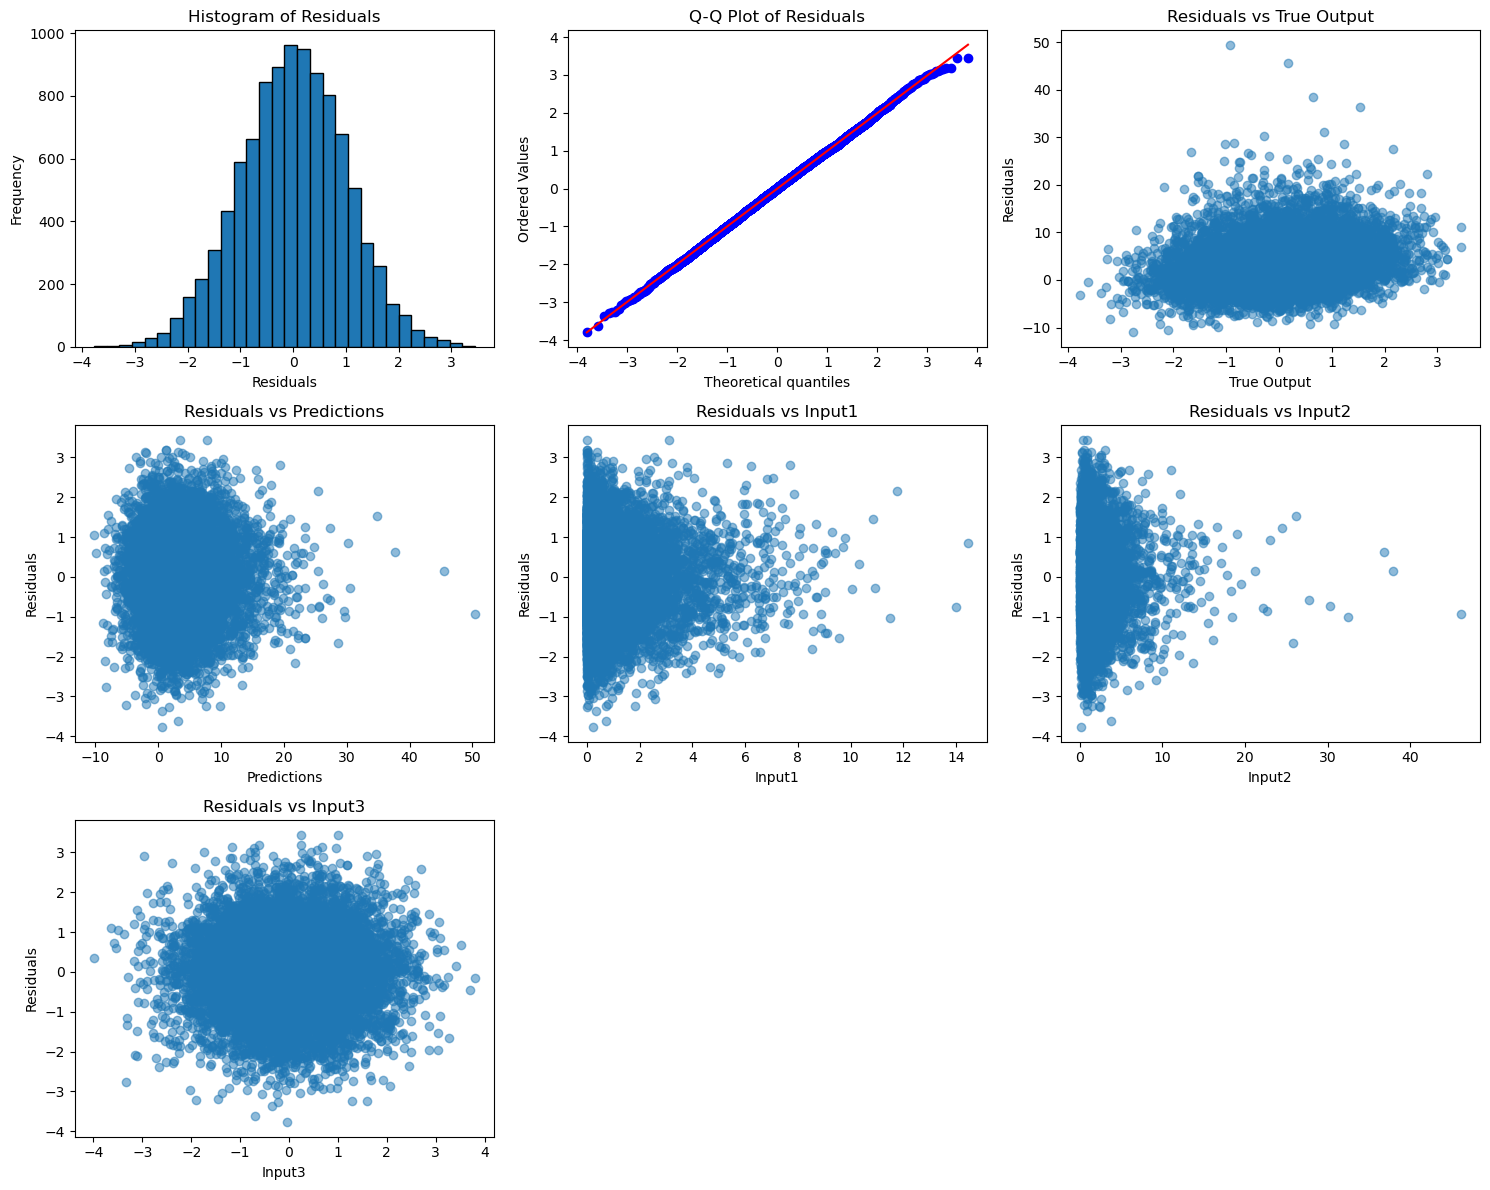

In [78]:


coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")

#no modificamos x transf porque ya hemos insertado antes la columna de unos 

data_transf["Predictions"] = linreg.predict(X_with_bias)
plot_residuals(data_transf, 'Output', 'Predictions')


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> Primero, vemos que el valor de R2 ha aumentado y tiene un valor muy proximo a 1, este coeficiente mide qué tan bien el modelo explica la variabilidad de la variable objetivo. Su valor oscila entre 0 y 1, por tanto, podemos afirmar que este modelo explica bien la variabilidad.
Tambien, podemos ver que los residuos estan mayoritariamente centrados en el 0 y aleatoriamente distribuidos

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [79]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [80]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]
#las columnas cateogorcias son estas
print(categorical_columns)


# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
print(X_encoded)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)


X_encoded_with_bias = np.insert(
            X_encoded, 0, 1, axis=1
        ) 
# Predict and evaluate
y_pred = model.predict(X_encoded_with_bias)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

[1, 4, 5]
[[19 0 27.9 ... 0 0 1]
 [18 1 33.77 ... 0 1 0]
 [28 1 33.0 ... 0 1 0]
 ...
 [18 0 36.85 ... 0 1 0]
 [21 0 25.8 ... 0 0 1]
 [61 0 29.07 ... 1 0 0]]
{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163618}


Compare yourself with scikit

In [81]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# TODO: One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163587}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

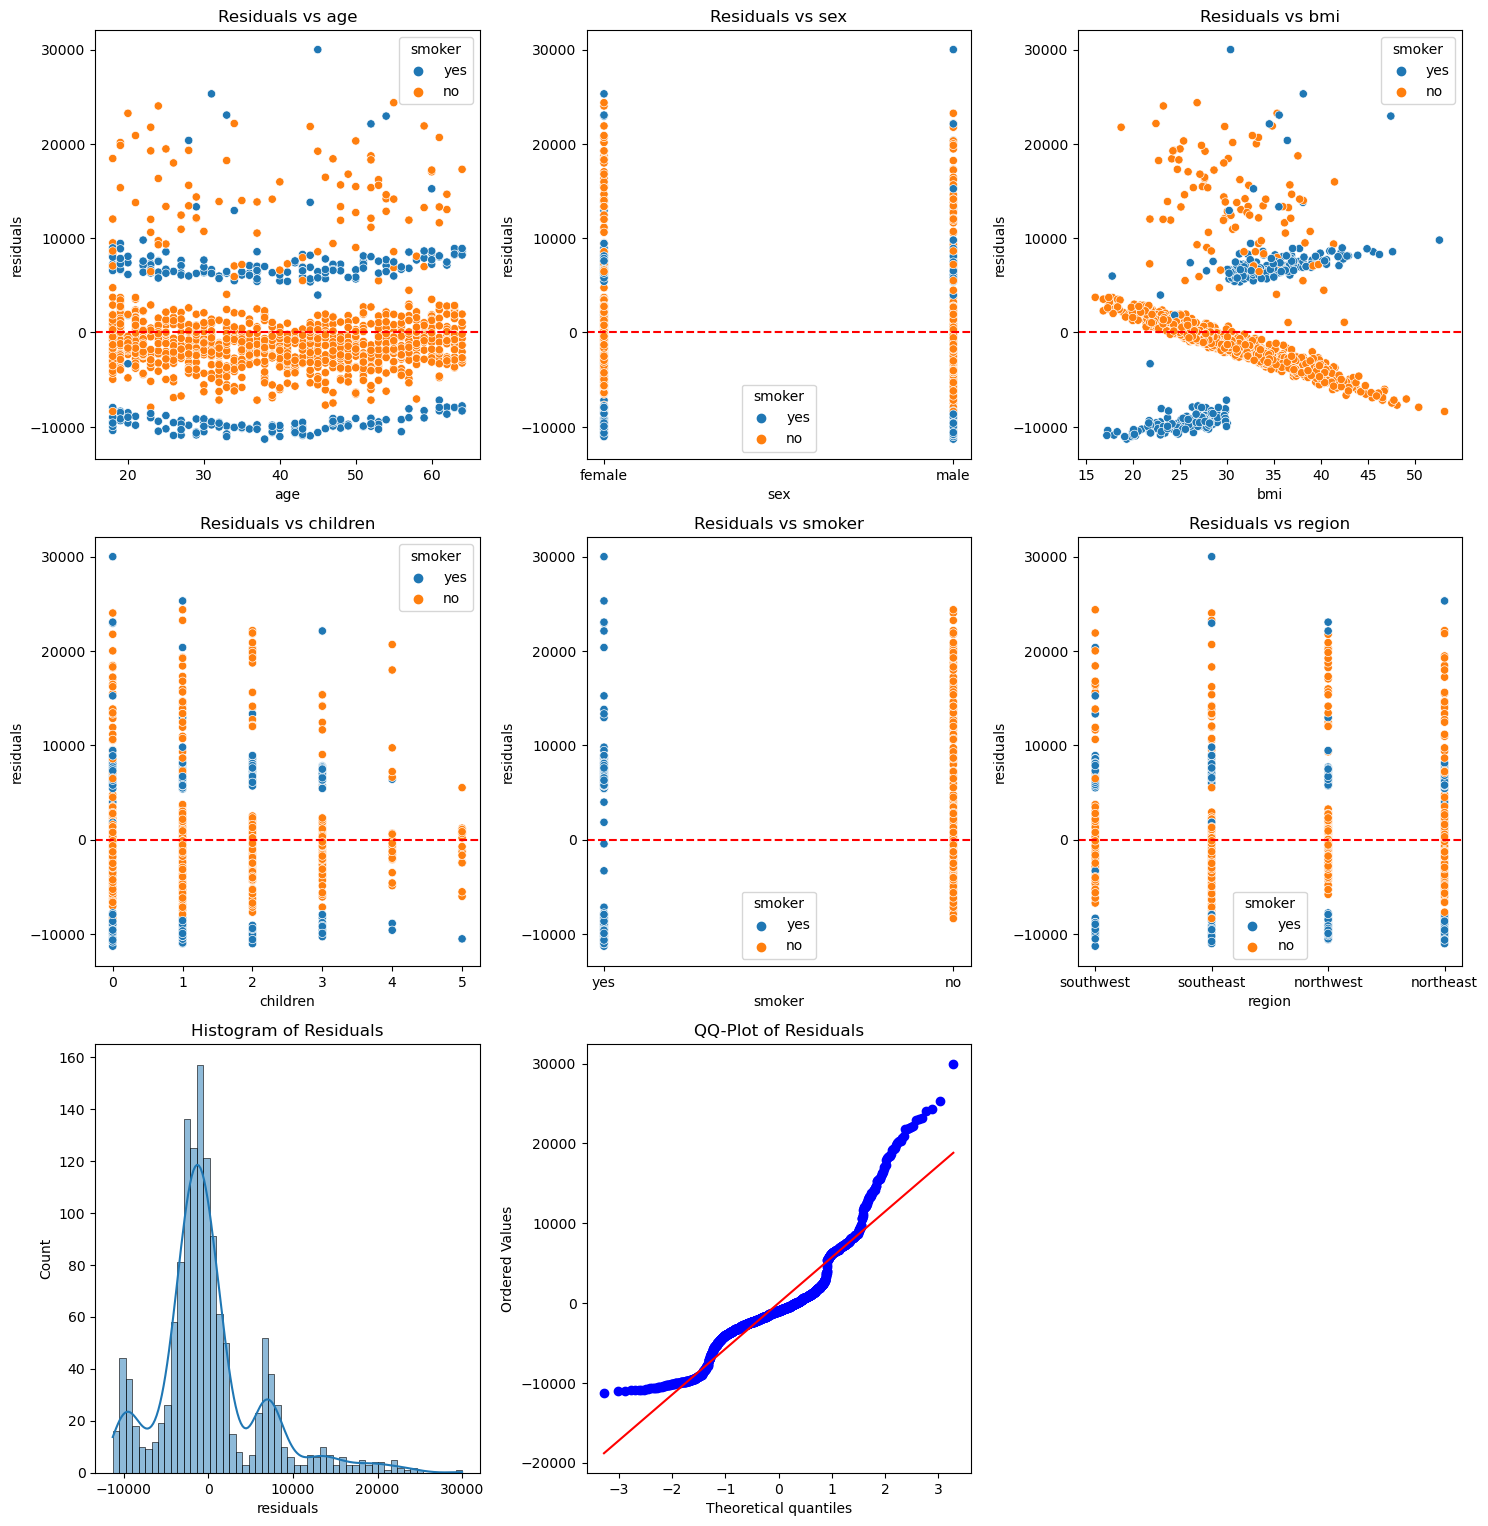

In [82]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # TODO: As before, calculate residuals
    data['residuals'] = data[output_column] - data[prediction_column]

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # TODO: Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax ,hue = data[categorical_var])
        else:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

print(X)

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> Write your answer here

# _Rolling in the deep_

from src.Lab_2_4_LR2 import fit_

In [83]:
print(X,type(X))

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

In [84]:
from src.Lab_2_4_LR2 import LinearRegressor

In [85]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [86]:
len(X)

1338

In [87]:
len(y)

import numpy as np

X = np.array(X)  # Convertir a array de NumPy si es un DataFrame

X

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [88]:
linreg = LinearRegressor()
linreg.fit(X, y)

In [89]:
linreg.fit(X,y,method="gradient_descent", learning_rate=0.00001,iterations=100000)
X_with_bias = np.insert(
            X, 0, 1, axis=1
        ) 
predictions = linreg.predict(X_with_bias)
evaluate_regression(y,predictions)

Epoch 0: MSE = 431681501095.97974
Epoch 1000: MSE = 174433973364.07394
Epoch 2000: MSE = 174022885910.40643
Epoch 3000: MSE = 173616640506.7827
Epoch 4000: MSE = 173212568672.39215
Epoch 5000: MSE = 172810188993.48938
Epoch 6000: MSE = 172409406412.72992
Epoch 7000: MSE = 172010194284.35147
Epoch 8000: MSE = 171612538231.47336
Epoch 9000: MSE = 171216426228.18292
Epoch 10000: MSE = 170821846843.37024
Epoch 11000: MSE = 170428788925.77213
Epoch 12000: MSE = 170037241543.62204
Epoch 13000: MSE = 169647193969.39038
Epoch 14000: MSE = 169258635672.6187
Epoch 15000: MSE = 168871556314.3123
Epoch 16000: MSE = 168485945741.73236
Epoch 17000: MSE = 168101793983.38083
Epoch 18000: MSE = 167719091244.13663
Epoch 19000: MSE = 167337827900.53357
Epoch 20000: MSE = 166957994496.17407
Epoch 21000: MSE = 166579581737.27505
Epoch 22000: MSE = 166202580488.34186
Epoch 23000: MSE = 165826981767.96646
Epoch 24000: MSE = 165452776744.7467
Epoch 25000: MSE = 165079956733.3225
Epoch 26000: MSE = 16470851319

{'R2': 0.2830503302614027, 'RMSE': 10250.06283103326, 'MAE': 8061.934162792734}

In [90]:
historial_loss=linreg.loss_historial
valores_w=linreg.valores_w
valores_b=linreg.valores_b

In [91]:
print(historial_loss)

[431681501095.97974, 418361059590.9087, 405731469323.1535, 393756898772.4535, 382403374847.5679, 371638686497.4416, 361432293321.6532, 351755238920.8494, 342580068741.32654, 333880752180.66425, 325632608733.4105, 317812237967.27625, 310397453131.1681, 303367218206.6909, 296701588224.522, 290381652676.32153, 284389481861.6284, 278708076017.5135, 273321317086.66315, 268213922987.04776, 263371404253.42804, 258780022927.6831, 254426753581.3226, 250299246359.59607, 246385791942.34744, 242675288322.20178, 239157209305.82623, 235821574648.89722, 232658921740.04022, 229660278753.40366, 226817139193.69452, 224121437761.45575, 221565527470.10852, 219142157949.83734, 216844454876.76007, 214665900469.01968, 212600314994.46155, 210641839237.42847, 208784917874.92917, 207024283715.01404, 205354942752.6401, 203772160000.62402, 202271446055.48438, 200848544360.05637, 199499419126.7403, 198220243887.12073, 197007390635.4677, 195857419535.31894, 194767069159.9376, 193733247238.95642, 192753021884.9541, 

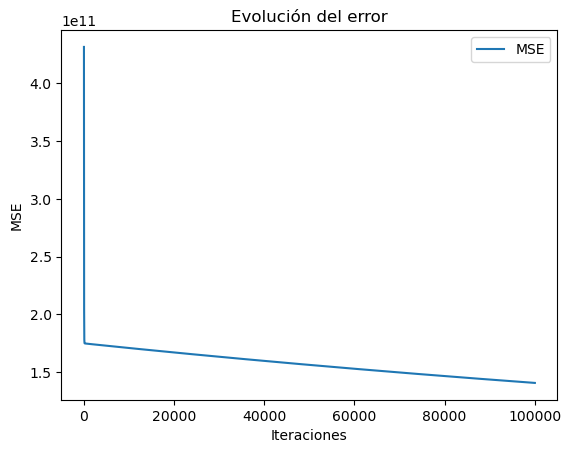

In [92]:
# Entrenar el modelo y obtener los datos
loss_history, w_values, b_values = historial_loss, valores_w, valores_b

import matplotlib.pyplot as plt

plt.plot(range(len(loss_history)), loss_history, label="MSE")
plt.xlabel("Iteraciones")
plt.ylabel("MSE")
plt.title("Evolución del error")
plt.legend()
plt.show()




In [93]:
#  using the same representation as in the previous section
# where each axis represents the values of w and b,
# show the sequence of steps that bring you closer to the 
# optimum each time. Each step should be a point in space,
# with coordinates (w,b). Compare all the results with the 
# optimal solution from the scikit fit coefficients.

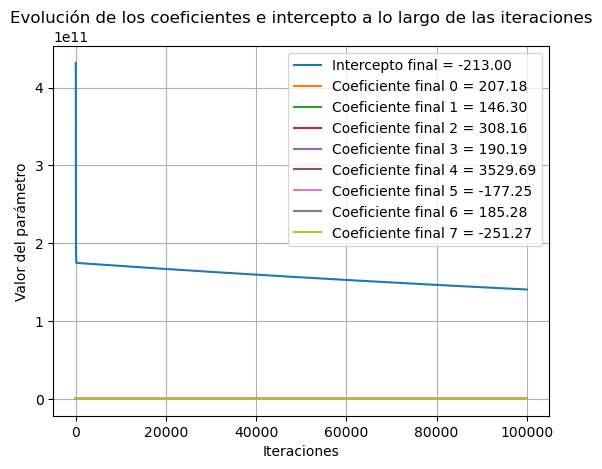

In [94]:
num_iteraciones = 100000
valores_x = np.arange(num_iteraciones)

plt.plot(valores_x, historial_loss, label=f'Intercepto final = {linreg.intercept:.2f}')

valores_parametros = np.column_stack((valores_w, valores_b))

for idx, coef in enumerate(linreg.coefficients):
    plt.plot(valores_x, valores_parametros[:, idx], label=f'Coeficiente final {idx} = {coef:.2f}')

plt.title('Evolución de los coeficientes e intercepto a lo largo de las iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Valor del parámetro')
plt.legend()
plt.grid(True)
plt.show()

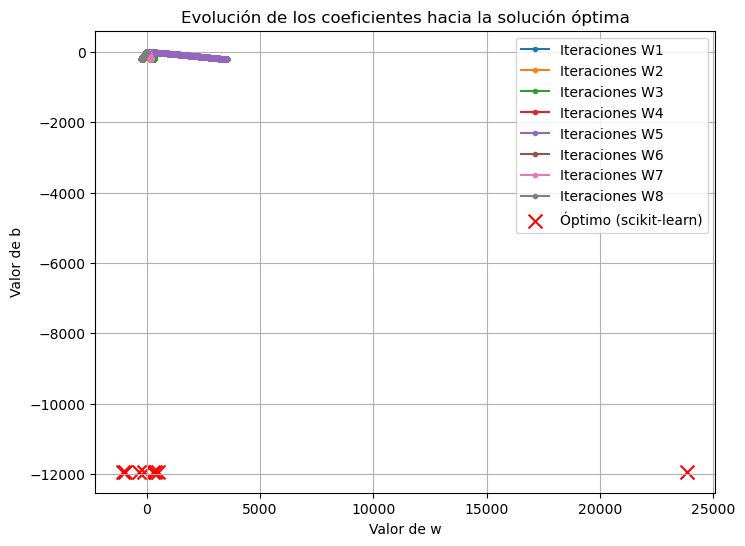

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_scikit = LinearRegression()
linreg_scikit.fit(X, y)

#historial de coeficientes e interceptos que hemos entrenado
w_historial = np.array(valores_w)
b_historial = np.array(valores_b) 



w_optimos = linreg_scikit.coef_
b_optimo = linreg_scikit.intercept_


plt.figure(figsize=(8, 6))

for i in range(w_historial.shape[1]): 
    plt.plot(w_historial[:, i], b_historial, linestyle='-', marker='o', markersize=3, label=f'Iteraciones W{i+1}')  


plt.scatter(w_optimos, [b_optimo] * len(w_optimos), color='red', marker='x', s=100, label="Óptimo (scikit-learn)")

plt.xlabel("Valor de w")
plt.ylabel("Valor de b")
plt.title("Evolución de los coeficientes hacia la solución óptima")
plt.legend()
plt.grid(True)
plt.show()
